The kNN task can be broken down into writing 3 primary functions:
1.	Calculate the distance between any two points
2.	Find the nearest neighbours based	on these pair wise distances
3.	Majority vote on a class labels based on the nearest neighbour list

In [5]:
#Loading iris dataset and defining the our target and data
from sklearn import datasets
import pandas as pd

iris=datasets.load_iris()
X = pd.DataFrame(iris.data) 
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']

y = pd.DataFrame(iris.target)
y.columns = ['Targets']


# Train the Model

In [6]:
# splitting the data into training and test sets (80:20)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [7]:
#shape of train and test objects
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [8]:
# shape of new y objects
print(y_train.shape)
print(y_test.shape)

(120, 1)
(30, 1)


In [9]:
#import the KNeighborsClassifier class from sklearn
from sklearn.neighbors import KNeighborsClassifier

#import metrics model to check the accuracy 
from sklearn import metrics
#Try running from k=1 through 25 and record testing accuracy
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred=knn.predict(X_test)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))

C:\Users\brind\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':
C:\Users\brind\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':
C:\Users\brind\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':
C:\Users\brind\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':
C:\U

In [13]:
#Testing accuracy for each value of K
scores

{1: 0.9333333333333333,
 2: 0.9333333333333333,
 3: 0.9666666666666667,
 4: 0.9666666666666667,
 5: 0.9666666666666667,
 6: 0.9666666666666667,
 7: 0.9666666666666667,
 8: 0.9666666666666667,
 9: 0.9666666666666667,
 10: 0.9666666666666667,
 11: 0.9666666666666667,
 12: 0.9666666666666667,
 13: 0.9666666666666667,
 14: 0.9666666666666667,
 15: 0.9666666666666667,
 16: 0.9666666666666667,
 17: 0.9666666666666667,
 18: 0.9666666666666667,
 19: 0.9666666666666667,
 20: 0.9333333333333333,
 21: 0.9666666666666667,
 22: 0.9333333333333333,
 23: 0.9666666666666667,
 24: 0.9666666666666667,
 25: 0.9666666666666667}

Text(0, 0.5, 'Testing Accuracy')

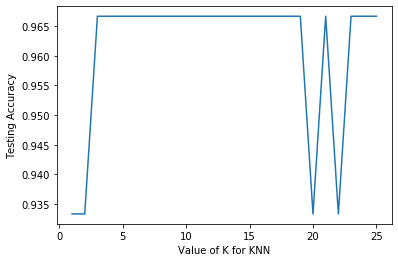

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

K values with 3 to 19 has the same accuracy which is 96.66, so we can use any one value from that, i choose K as 5 and train the model with full training data

In [15]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)

C:\Users\brind\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [17]:
#0 = setosa, 1=versicolor, 2=virginica
classes = {0:'setosa',1:'versicolor',2:'virginica'}

#Making prediction on some unseen data 
#predict for the below two random observations
x_new = [[3,4,5,2],
         [5,4,2,2]]
y_predict = knn.predict(x_new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])

versicolor
setosa
